In [2]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [4]:
!pip install openpyxl


[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
excel_path = 'test_dataframes.xlsx'
xls = pd.ExcelFile(excel_path)

combined_data = []

for sheet in xls.sheet_names:
    print(f"Reading sheet: {sheet}")
    data = xls.parse(sheet)
    data = data.select_dtypes(include=[np.number])  # Only numeric columns
    if data.shape[1] < 2:
        print(f"Skipping sheet {sheet} due to insufficient numeric data.")
        continue
    combined_data.append(data)

# Combine all sheets
df = pd.concat(combined_data, axis=0).reset_index(drop=True)
print("\nCombined data shape:", df.shape)

Reading sheet: Week 15, Apr 2019
Reading sheet: Week 21, May 2019
Reading sheet: Week 24, Jun 2019
Reading sheet: Week 29, Jul 2019
Reading sheet: Week 33, Aug 2019
Reading sheet: Week 37, Sep 2019
Reading sheet: Week 41, Oct 2019
Reading sheet: Week 44, Nov 2019
Reading sheet: Week 51, Dec 2019
Reading sheet: Week 01, Jan 2020
Reading sheet: Week 06, Feb 2020
Reading sheet: Week 10, Mar 2020
Reading sheet: Week 20, May 2020
Reading sheet: Week 24, Jun 2020

Combined data shape: (2352, 11)


In [6]:
df.head()

,week_X-2,week_X-3,week_X-4,MA_X-4,dayOfWeek,weekend,holiday,Holiday_ID,hourOfDay,T2M_toc,DEMAND
0,1064.7486,1204.5668,1117.8152,1118.154250,1,1,0,0,1,26.791528,1161.6177
1,1041.7521,1145.5341,1082.5688,1078.061950,1,1,0,0,2,26.707971,1130.4635
2,1021.1577,1069.8026,1050.1252,1040.469075,1,1,0,0,3,26.616541,1093.8777
3,990.2549,1047.7100,1039.1658,1021.725725,1,1,0,0,4,26.542291,1083.0332
4,1005.2366,1038.5837,1039.1370,1021.294000,1,1,0,0,5,26.467188,1081.2705


In [7]:
df.shape

(2352, 11)

In [8]:
df.describe()

,week_X-2,week_X-3,week_X-4,MA_X-4,dayOfWeek,weekend,holiday,Holiday_ID,hourOfDay,T2M_toc,DEMAND
count,2352.000000,2352.000000,2352.000000,2352.000000,2352.000000,2352.000000,2352.000000,2352.000000,2352.000000,2352.000000,2352.000000
mean,1215.797613,1254.520252,1237.946186,1236.770128,4.000000,0.285714,0.082058,1.075680,11.500000,27.635243,1223.851692
std,184.643319,194.426413,192.642192,181.691430,2.000425,0.451850,0.274511,3.987781,6.923659,1.582233,187.979440
min,816.354100,840.758200,821.847600,863.183750,1.000000,0.000000,0.000000,0.000000,0.000000,23.920160,855.163800
25%,1057.887750,1096.548275,1078.479825,1082.294833,2.000000,0.000000,0.000000,0.000000,5.750000,26.452173,1069.919150
50%,1197.012450,1230.336950,1217.845050,1215.320871,4.000000,0.000000,0.000000,0.000000,11.500000,27.362283,1200.118050
75%,1349.986125,1399.248800,1380.446125,1375.674188,6.000000,1.000000,0.000000,0.000000,17.250000,28.736078,1364.987825
max,1738.038600,1729.608200,1754.882000,1669.729025,7.000000,1.000000,1.000000,21.000000,23.000000,32.506158,1709.329800


In [9]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
print(X_train.shape)
print(X_test.shape)

(1881, 9)
(471, 9)


In [12]:
y_test.shape

(471,)

In [13]:
from sklearn.ensemble import RandomForestRegressor

In [14]:
rf = RandomForestRegressor()

In [15]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Taking the square root of MSE
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

Mean Squared Error: 2811.6067299961496
Root Mean Squared Error: 53.024586089814505
Mean Absolute Error: 41.974324600849265
R2 Score: 0.9156959602877437


In [16]:
y_test

1960    1394.3462
668     1171.0447
2082    1137.4698
808     1371.9881
1907    1586.9330
          ...    
2243    1214.6928
374     1186.6003
834     1411.8990
1330    1583.9725
2010    1369.3283
Name: DEMAND, Length: 471, dtype: float64

In [17]:
y_pred

array([1372.485095, 1266.032008, 1179.821107, 1351.897448, 1600.167355,
       1276.932016, 1209.528147, 1576.079651, 1379.609021, 1060.40636 ,
       1089.25721 , 1258.858809,  998.784913, 1300.387779, 1195.69876 ,
       1415.006049,  927.013089, 1513.09188 , 1194.754202, 1027.157118,
       1290.904709, 1178.537099, 1312.903018, 1548.579703, 1463.383288,
       1200.333048, 1071.146049, 1178.8259  , 1064.958314, 1111.81119 ,
       1540.867747, 1103.552497, 1445.976818,  993.063112, 1080.985832,
       1029.773476, 1520.907713, 1362.360304, 1181.030148, 1150.866876,
       1046.775711, 1036.714454, 1255.228162, 1269.641999, 1331.061719,
        991.15045 ,  950.974945, 1323.707241, 1165.399715, 1165.332705,
       1025.067418, 1624.153629, 1567.322713, 1116.442924, 1034.281604,
       1324.099647, 1027.242267, 1090.419503, 1013.053875, 1199.091524,
       1309.06634 , 1312.789564, 1420.724056, 1060.54323 , 1537.04349 ,
       1112.87765 , 1490.660501, 1135.827572, 1333.000261, 1214.

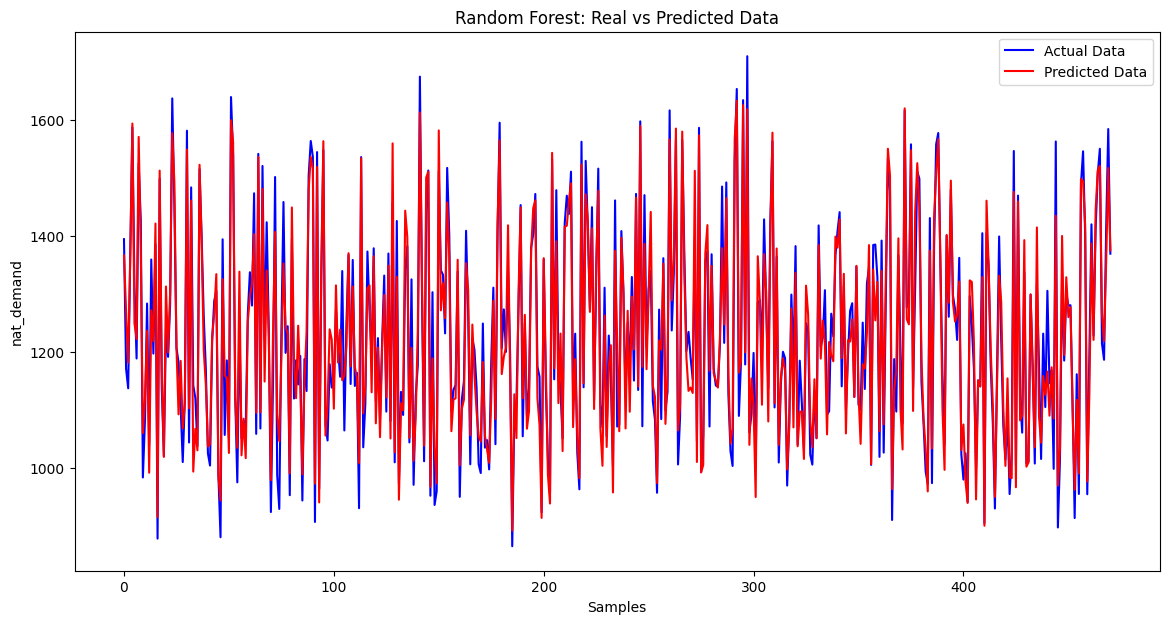

In [25]:
predictions = y_pred
plt.figure(figsize=(14, 7))
plt.plot(np.array(y_test), color='blue', label='Actual Data')
plt.plot(predictions, color='red', label='Predicted Data')
plt.title('Random Forest: Real vs Predicted Data')
plt.xlabel('Samples')
plt.ylabel('nat_demand')
plt.legend()
plt.show()

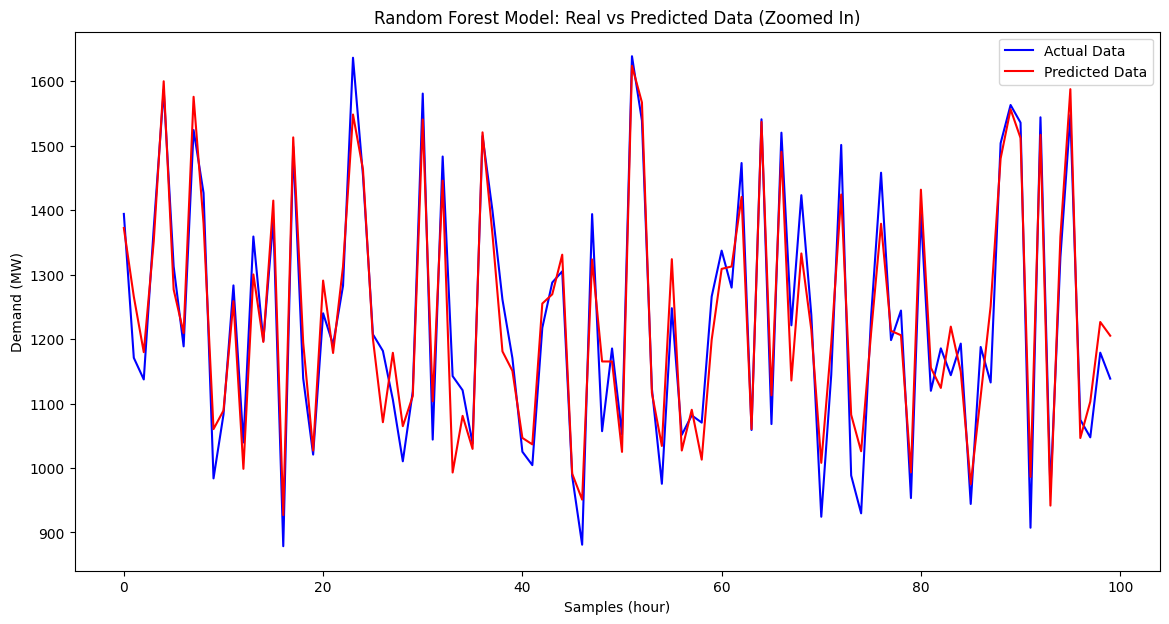

In [19]:
start_sample = 0
end_sample = 100

# Slice the test data and predictions
y_test_zoomed = np.array(y_test[start_sample:end_sample])
predictions_zoomed = predictions[start_sample:end_sample]

# Plot the zoomed-in data
plt.figure(figsize=(14, 7))
plt.plot(y_test_zoomed, color='blue', label='Actual Data')
plt.plot(predictions_zoomed, color='red', label='Predicted Data')
plt.title('Random Forest Model: Real vs Predicted Data (Zoomed In)')
plt.xlabel('Samples (hour)')
plt.ylabel('Demand (MW)')
plt.legend()
plt.show()

In [20]:
!pip install xgboost


[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    # random_state=42
)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)


Mean Squared Error: 2580.531835738552
Root Mean Squared Error: 50.798935379971816
R² Score: 0.9226245775990363


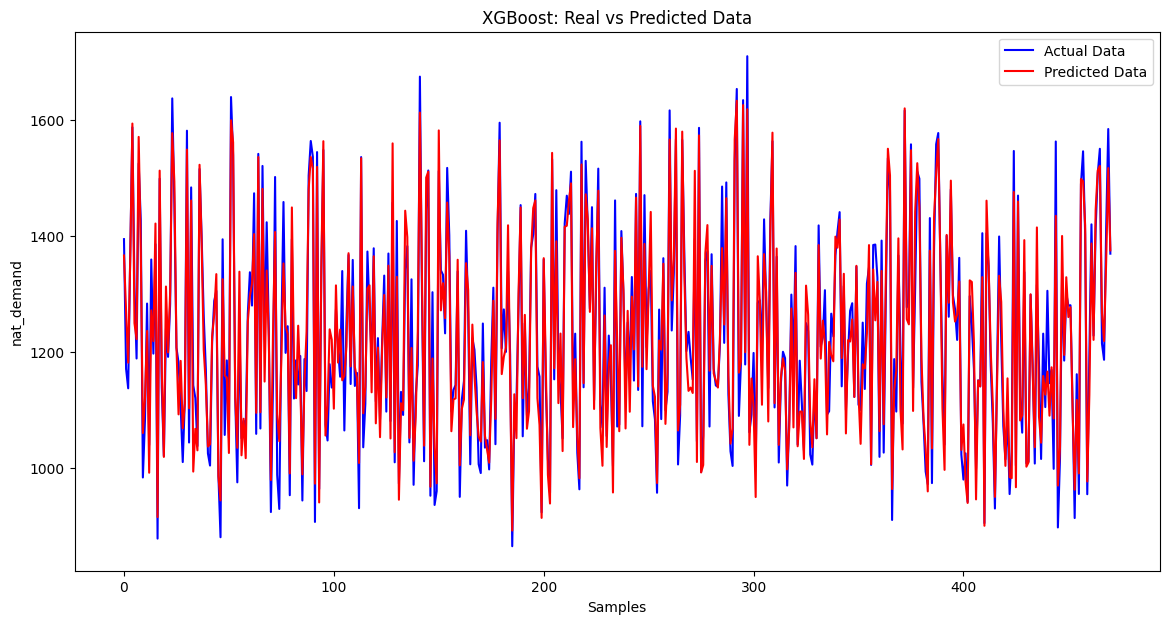

In [24]:
predictions = y_pred
plt.figure(figsize=(14, 7))
plt.plot(np.array(y_test), color='blue', label='Actual Data')
plt.plot(predictions, color='red', label='Predicted Data')
plt.title('XGBoost: Real vs Predicted Data')
plt.xlabel('Samples')
plt.ylabel('nat_demand')
plt.legend()
plt.show()

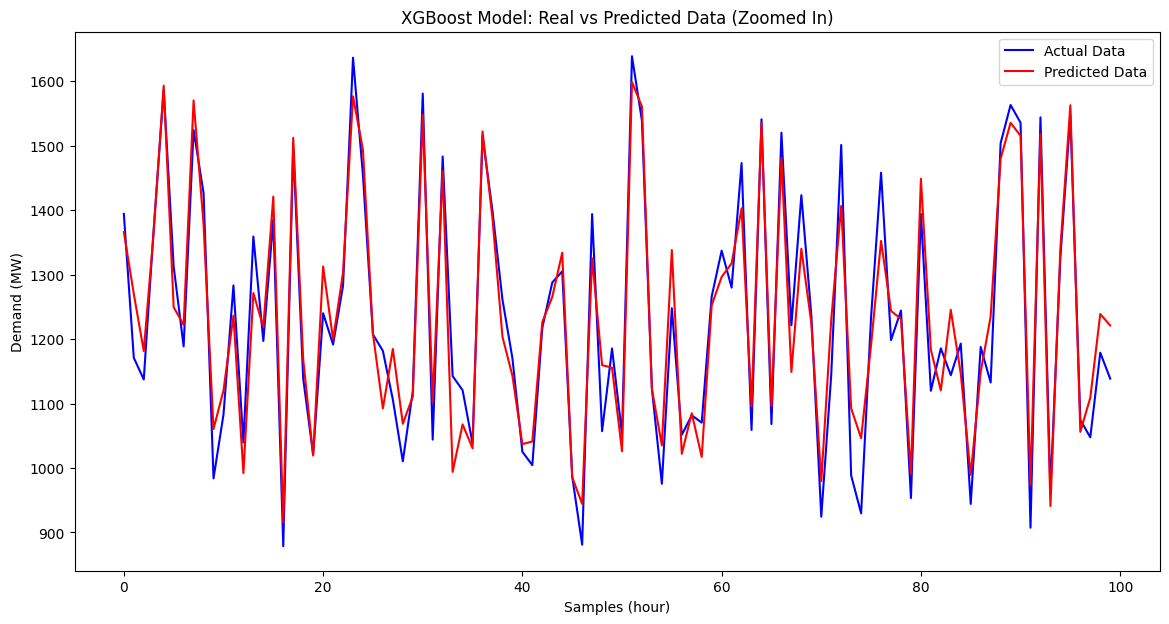

In [26]:
start_sample = 0
end_sample = 100

# Slice the test data and predictions
y_test_zoomed = np.array(y_test[start_sample:end_sample])
predictions_zoomed = predictions[start_sample:end_sample]

# Plot the zoomed-in data
plt.figure(figsize=(14, 7))
plt.plot(y_test_zoomed, color='blue', label='Actual Data')
plt.plot(predictions_zoomed, color='red', label='Predicted Data')
plt.title('XGBoost Model: Real vs Predicted Data (Zoomed In)')
plt.xlabel('Samples (hour)')
plt.ylabel('Demand (MW)')
plt.legend()
plt.show()